In [119]:
import pandas as pd
import numpy as np
import seaborn as sns

URI = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'

dados = pd.read_csv(URI)

In [120]:
dados

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170
...,...,...,...
2152,0,80,7518
2153,1,52,1332
2154,0,40,473
2155,0,75,5324


In [121]:
# Renomeando o nome das colunas
renomear = {
    'unfinished':'nao_finalizado',
    'expected_hours': 'horas_esperadas',
    'price':'preco'
}
dados.rename(columns=renomear, inplace=True)

# Criando uma nova coluna para projetos finalizados
swap = {
    1:0,
    0:1
}
dados['finalizados'] = dados['nao_finalizado'].map(swap)

dados

,nao_finalizado,horas_esperadas,preco,finalizados
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0
...,...,...,...,...
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1


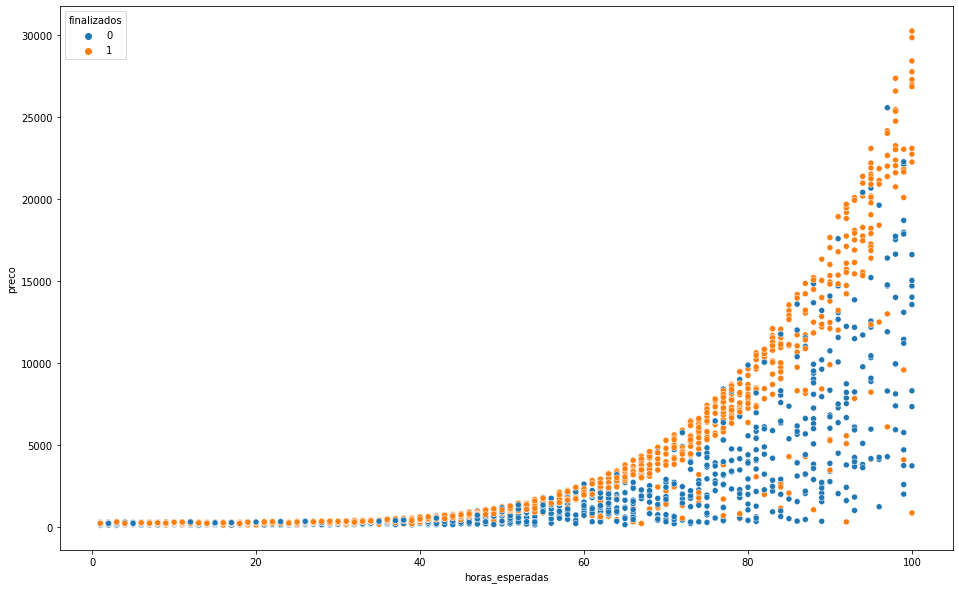

In [122]:
# Plotando a relação distribuida entre Horas de Projeto, Preço e Finalizados
ax = sns.scatterplot(x=dados['horas_esperadas'], y=dados['preco'], hue=dados['finalizados'])
ax.figure.set_size_inches(16,10)

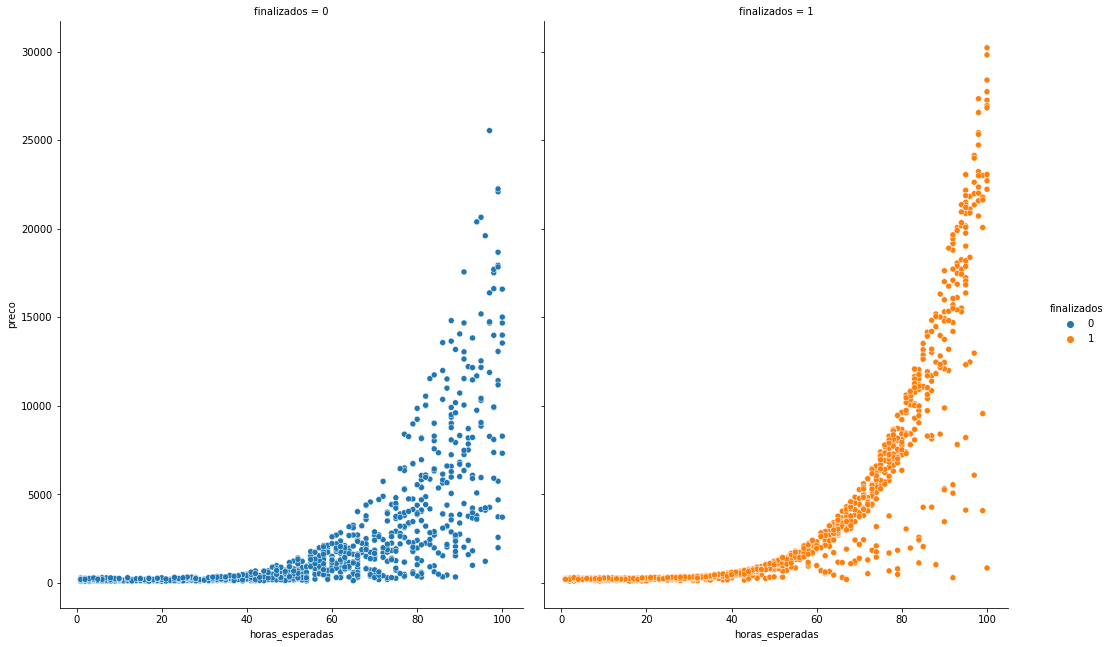

In [123]:
ax = sns.relplot(x=dados['horas_esperadas'], y=dados['preco'], hue=dados['finalizados'], col=dados['finalizados'])
ax.figure.set_size_inches(16,10)

### IA que aprende a prevê se um projeto será ou não finalizado.

In [124]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizados']

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20
#Solução Problema 02:
np.random.seed(SEED)
treino_x, test_x, treino_y, test_y = train_test_split(
    x, y, 
    # random_state=SEED, 
    test_size=0.25,
    stratify=y) #
print('Utilizando %d para treino em x e y e %d para teste.' % (len(treino_x), len(test_x)))

#
# Problema 02: LinearSVC utiliza um valor randomico; Solução: alterar a biblioteca randomica do Numpy, 
# de modo que não será mais necessário definir o random_state em qualquer biblioteca que faça uso dela 
# como é o caso da biblioteca train_test_split().
#

model = LinearSVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(test_x)
resultado = accuracy_score(test_y, previsoes) * 100
print('Acuracia = %.2f%%' % (resultado))

Utilizando 1617 para treino em x e y e 540 para teste.
Acuracia = 51.48%


c:\VS CODE - Projetos\data-science-alura\venv\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Problema 01

Agora existe a necessídade de saber se a acuracia dos testes realizados foram ideais. Por isso será criado um script que cria uma linha de base para saber se a inteligência foi melhor do que arriscar todas as previsões como positivas

In [126]:
previsao_base = np.ones(540)

resultado = accuracy_score(test_y, previsao_base) * 100
print('Acuracia = %.2f%%' % (resultado))

Acuracia = 52.59%


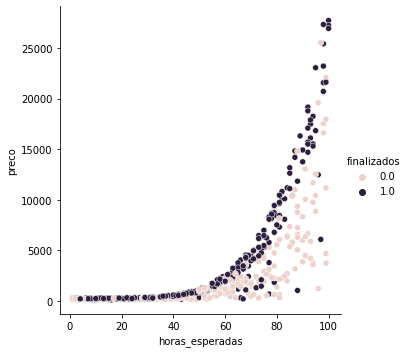

In [127]:
ax = sns.relplot(x=dados['horas_esperadas'], y=dados['preco'], hue=test_y, data=test_x)
ax


## Decision Boundary

In [128]:
# Capturando os pontos extremos do ponto cartesiano
xmin = test_x.horas_esperadas.min()
xmax = test_x.horas_esperadas.max()
ymin = test_x.preco.min()
ymax = test_x.preco.max()

print(xmin, xmax, ymin, ymax)


1 100 101 27738


In [129]:
# Dividi a tela em 100 pontos
pixels = 100
# É utilizado o Range(arange) do Numpy para dividir os eixos ponto a ponto 
# do mínimo ao ponto máximo.
eixo_x = np.arange(xmin, xmax, (xmax - xmin)/pixels)
eixo_y = np.arange(ymin, ymax, (ymax - ymin)/pixels)


In [130]:
# Cria um grid com eixos replicados
xx, yy = np.meshgrid(eixo_x, eixo_y)
# Concatenando os eixos
grid = np.c_[xx.ravel(), yy.ravel()]
grid


array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [131]:
# Cria modelo de predição
Z = model.predict(grid)
# Transformando Z em um modelo de 3D
Z = Z.reshape(xx.shape)
Z

c:\VS CODE - Projetos\data-science-alura\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

### Problema 02

A linha de decisão está tomando posições aleatórias de aprendizado devido a biblioteca ``LinearSVC`` (Linear Supporte Vector Classification), que utiliza o ``random_state = None`` herdada da ``np.random.seed()``. Para a correção desse problema e para evitar a verbosidade no código em todas as funções que utilizem o ``random_state``, deve ser definido um valor para a função antes da definição do treino e do teste.

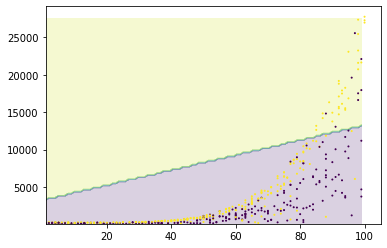

In [132]:
# Utilizar matplotlib por ser uma biblioteca mais baixo nível

import matplotlib.pyplot as plt
# Cria contorno com curva de separação entre zeros e uns
plt.contourf(xx, yy, Z, alpha=0.2)
# Plota resultado distribuido
plt.scatter(test_x.horas_esperadas, test_x.preco, c=test_y, s=1)

## Transformando a Decision Boundary de Linear para Exponencial com SVC (C-Supporte Vector Classification)

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 55.19%


c:\VS CODE - Projetos\data-science-alura\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


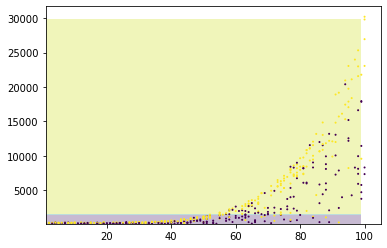

In [134]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

### Criando processo de escalar proporcional ao treino

In [135]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_test_x, treino_y, test_y = train_test_split(
    x, y, 
    test_size=0.25,
    stratify=y) #

# Criando o treinamento de Escalar o diagrama
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
test_x = scaler.transform(raw_test_x)


model = SVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(test_x)
resultado = accuracy_score(test_y, previsoes) * 100
print('Acuracia = %.2f%%' % (resultado))

Acuracia = 66.85%


### Problema 04
A tranformação com StandardScaler, tranformou o Data Frame ``raw_test_x.horas_esperadas`` em um array de array's 

-1.7348767953644189 1.7418048354450535 -0.5962799114048444 5.406738368968601


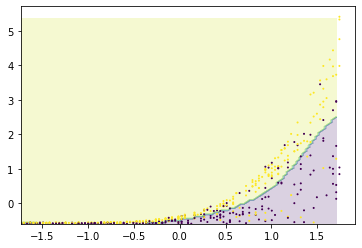

In [136]:
# Correção
data_x = test_x[:,0]
data_y = test_x[:,1]

xmin = data_x.min()
xmax = data_x.max()
ymin = data_y.min()
ymax = data_y.max()

print(xmin, xmax, ymin, ymax)


pixels = 100
eixo_x = np.arange(xmin, xmax, (xmax - xmin)/pixels)
eixo_y = np.arange(ymin, ymax, (ymax - ymin)/pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
grid = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(grid)
Z = Z.reshape(xx.shape)


import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(data_x, data_y, c=test_y, s=1)